## 보스턴 주택 가격 예측

Epoch 1/100
13/13 [==============================] - 2s 42ms/step - loss: 1374.0428 - val_loss: 572.1877
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 228.6063 - val_loss: 141.6368
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 92.2793 - val_loss: 92.8890
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 74.0074 - val_loss: 70.5221
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 64.2040 - val_loss: 62.3438
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 60.3031 - val_loss: 61.8518
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 58.9515 - val_loss: 61.0827
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 58.6552 - val_loss: 62.4086
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 59.0288 - val_loss: 61.4949
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 58.4406 - v

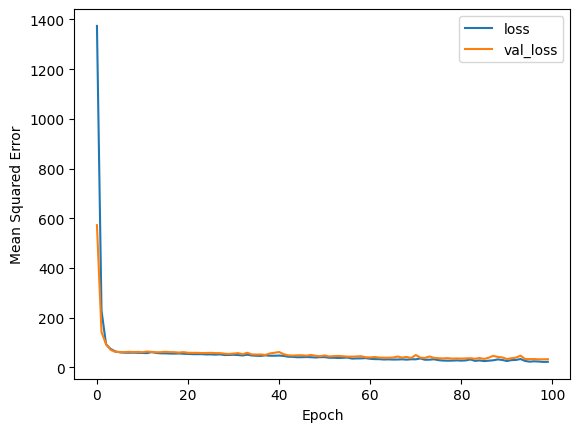

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot model performance
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


## MNIST 손글씨 분류

11490434/11490434 [==============================] - 0s 0us/step


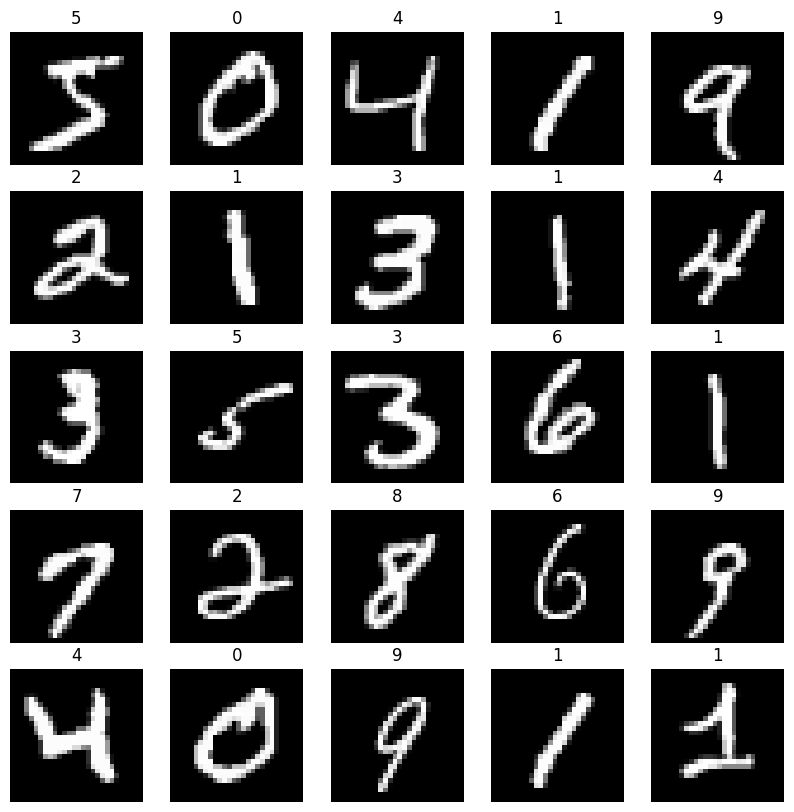

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2965 - accuracy: 0.9142 - val_loss: 0.1447 - val_accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1413 - accuracy: 0.9583 - val_loss: 0.1062 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.9665 - val_loss: 0.0908 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9730 - val_loss: 0.0755 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.0822 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9785 - val_loss: 0.0717 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy:

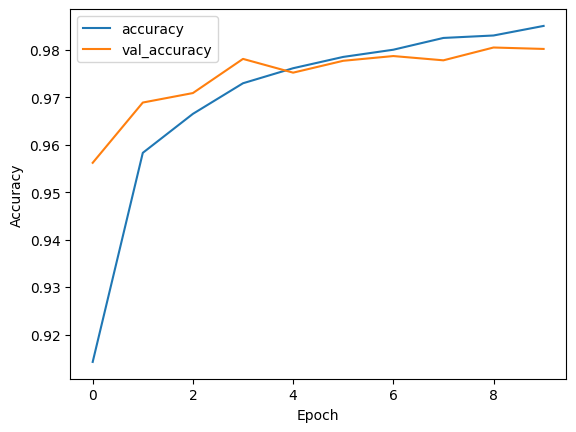

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Visualize MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

# Build model
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot model performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
